In [1]:
!pip install yfinance

  Using cached peewee-3.17.6-py3-none-any.whl
   ---------------------------------------- 0.0/73.5 kB ? eta -:--:--
   ---------------------------------------- 73.5/73.5 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   ---------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB 8.0 MB/s eta 0:00:01
   ------ --------------------------------- 0.6/3.8 MB 8.1 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/3.8 MB 8.1 MB/s eta 0:00:01
   -------------- ------------------------- 1.4/3.8 MB 8.0 MB/s eta 0:00:01
   ------------------ --------------------- 1.7/3.8 MB 7.9 MB/s eta 0:00:01
   ---------------------- ----------------- 2.1/3.8 MB 7.9 MB/s eta 0:00:01
   ------------------------- -------------- 2.5/3.8 MB 7.9 MB/s eta 0:00:01
   ----------------------------- ---------- 2.8/3.8 MB

In [2]:
!pip install bs4

In [3]:
!pip install pandas
!pip install plotly

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
    --------------------------------------- 0.3/16.4 MB 8.6 MB/s eta 0:00:02
   - -------------------------------------- 0.6/16.4 MB 8.1 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/16.4 MB 7.9 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/16.4 MB 7.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.7/16.4 MB 7.8 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/16.4 MB 7.8 MB/s eta 0:00:02
   ----- ---------------------------------- 2.4/16.4 MB 7.8 MB/s eta 0:00:02
   ------ --------------------------------- 2.8/16.4 MB 7.8 MB/s eta 0:00:02
   ------- -------------------------------- 3.2/16.4 MB 7.8 MB/s eta 0:00:02
   -------- ------------------------------- 3.5/16.4 MB 7.8 MB/s eta 0:00:02
   --------- ------------------------------ 3.9/16.4 MB 7.8 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/16.4 MB 7.9 MB/s eta 0:00:02
   ---

In [3]:
!pip install requests
!pip install bs4

## Question 1: Use yfinance to Extract Stock Data

In [10]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping
### Not using Yahoo Finance as it uses javascript so would need selenium or something else to read it

In [100]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL to fetch the data for GameStop revenue
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Set headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content from the URL
response = requests.get(url, headers=headers)
html_data = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Find the table containing the revenue data
table = soup.find('table', {'class': 'historical_data_table'})

# Check if the table is found
if table:
    # Manually set the correct headers
    headers = ['Year', 'Revenue (Millions of US $)']
    print("Headers:", headers)  # Debug print to check headers

    # Extract data rows
    data_rows = []
    for row in table.find_all('tr'):
        try:
            cols = row.find_all('td')
            cols = [col.text.strip().replace(',', '').replace('$', '').replace('-', '0') for col in cols]
            if len(cols) == 2:  # Ensure each row has exactly 2 columns
                data_rows.append(cols)
        except Exception as e:
            # Print the error message if needed for debugging
            # print(f"Error processing row: {e}")
            pass

    # Debug print to check data rows
    for row in data_rows:
        print("Row:", row)

    # Create a DataFrame from the extracted data
    try:
        if data_rows:
            tesla_revenue = pd.DataFrame(data_rows, columns=headers)

            # Display the DataFrame
            print(tesla_revenue)

            # Optionally save the DataFrame to a CSV file
            tesla_revenue.to_csv('gamestop_revenue.csv', index=False)
        else:
            print("No data rows found.")
    except Exception as e:
        print(f"Error creating DataFrame: {e}")
else:
    print("No table found.")

Headers: ['Year', 'Revenue (Millions of US $)']
Row: ['2023', '96773']
Row: ['2022', '81462']
Row: ['2021', '53823']
Row: ['2020', '31536']
Row: ['2019', '24578']
Row: ['2018', '21461']
Row: ['2017', '11759']
Row: ['2016', '7000']
Row: ['2015', '4046']
Row: ['2014', '3198']
Row: ['2013', '2013']
Row: ['2012', '413']
Row: ['2011', '204']
Row: ['2010', '117']
Row: ['2009', '112']
    Year Revenue (Millions of US $)
0   2023                      96773
1   2022                      81462
2   2021                      53823
3   2020                      31536
4   2019                      24578
5   2018                      21461
6   2017                      11759
7   2016                       7000
8   2015                       4046
9   2014                       3198
10  2013                       2013
11  2012                        413
12  2011                        204
13  2010                        117
14  2009                        112


## Extracting GameStop Stock Data Using yfinance

In [83]:
import yfinance as yf

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [109]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL to fetch the data for GameStop revenue
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Set headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content from the URL
response = requests.get(url, headers=headers)
html_data = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Find the table containing the revenue data
table = soup.find('table', {'class': 'historical_data_table'})

# Check if the table is found
if table:
    # Manually set the correct headers
    headers = ['Year', 'Revenue (Millions of US $)']
    print("Headers:", headers)  # Debug print to check headers

    # Extract data rows
    data_rows = []
    for row in table.find_all('tr'):
        try:
            cols = row.find_all('td')
            cols = [col.text.strip().replace(',', '').replace('$', '').replace('-', '0') for col in cols]
            if len(cols) == 2:  # Ensure each row has exactly 2 columns
                data_rows.append(cols)
        except Exception as e:
            # Print the error message if needed for debugging
            # print(f"Error processing row: {e}")
            pass

    # Debug print to check data rows
    for row in data_rows:
        print("Row:", row)

    # Create a DataFrame from the extracted data
    try:
        if data_rows:
            gme_revenue = pd.DataFrame(data_rows, columns=headers)

            # Display the DataFrame
            print(gme_revenue)

            # Optionally save the DataFrame to a CSV file
            gmep_revenue.to_csv('gme_revenue.csv', index=False)
        else:
            print("No data rows found.")
    except Exception as e:
        print(f"Error creating DataFrame: {e}")
else:
    print("No table found.")


Headers: ['Year', 'Revenue (Millions of US $)']
Row: ['2024', '5273']
Row: ['2023', '5927']
Row: ['2022', '6011']
Row: ['2021', '5090']
Row: ['2020', '6466']
Row: ['2019', '8285']
Row: ['2018', '8547']
Row: ['2017', '7965']
Row: ['2016', '9364']
Row: ['2015', '9296']
Row: ['2014', '9040']
Row: ['2013', '8887']
Row: ['2012', '9551']
Row: ['2011', '9474']
Row: ['2010', '9078']
Row: ['2009', '8806']
    Year Revenue (Millions of US $)
0   2024                       5273
1   2023                       5927
2   2022                       6011
3   2021                       5090
4   2020                       6466
5   2019                       8285
6   2018                       8547
7   2017                       7965
8   2016                       9364
9   2015                       9296
10  2014                       9040
11  2013                       8887
12  2012                       9551
13  2011                       9474
14  2010                       9078
15  2009                

## Question 5 - Tesla Stock and Revenue Dashboard

In [97]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [98]:
import pandas as pd

# Assuming tesla_revenue is already fetched and cleaned as per the previous instructions
# tesla_revenue = ... (Your cleaned revenue DataFrame)

# Clean and prepare stock data
tesla_data.reset_index(inplace=True)  # Reset index to make 'Date' a column
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data = tesla_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Clean and prepare revenue data
# Assuming tesla_revenue DataFrame looks something like this:
# tesla_revenue = pd.DataFrame({'Year': [...], 'Revenue (Millions of US $)': [...]})
tesla_revenue['Year'] = pd.to_datetime(tesla_revenue['Year'], format='%Y')

In [99]:
!pip install seaborn
!pip install matplotlib

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming tesla_data and tesla_revenue are already defined and cleaned

# Example data (if not defined)
# tesla_revenue = pd.DataFrame({
#     'Year': ['2023-01-01', '2022-01-01', '2021-01-01', '2020-01-01', '2019-01-01'],
#     'Revenue (Millions of US $)': [96773, 81462, 53823, 31536, 24578]
# })

# Convert the 'Year' column to datetime
tesla_revenue['Year'] = pd.to_datetime(tesla_revenue['Year'], errors='coerce')

# Extract year from the 'Year' column and update the dataframe
tesla_revenue['Year'] = tesla_revenue['Year'].dt.year

# Convert the 'Revenue (Millions of US $)' column to numeric
tesla_revenue['Revenue (Millions of US $)'] = tesla_revenue['Revenue (Millions of US $)'].replace(r'[\$,]', '', regex=True).astype(float)

# Display the tesla_revenue DataFrame to inspect the data
print("tesla_revenue DataFrame after converting 'Year' to datetime and extracting year:")
print(tesla_revenue)


tesla_revenue DataFrame after converting 'Year' to datetime and extracting year:
    Year  Revenue (Millions of US $)
0   2023                     96773.0
1   2022                     81462.0
2   2021                     53823.0
3   2020                     31536.0
4   2019                     24578.0
5   2018                     21461.0
6   2017                     11759.0
7   2016                      7000.0
8   2015                      4046.0
9   2014                      3198.0
10  2013                      2013.0
11  2012                       413.0
12  2011                       204.0
13  2010                       117.0
14  2009                       112.0


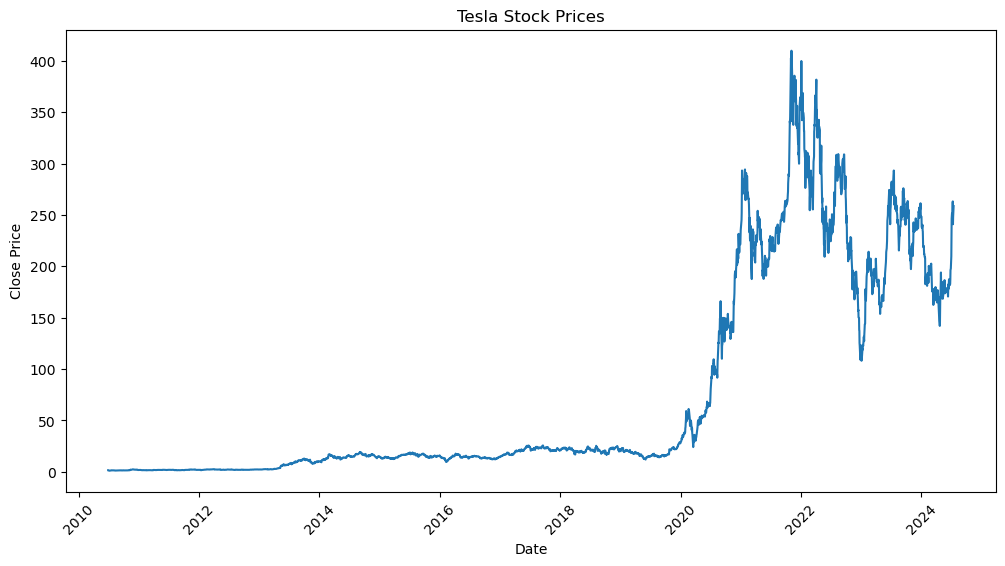

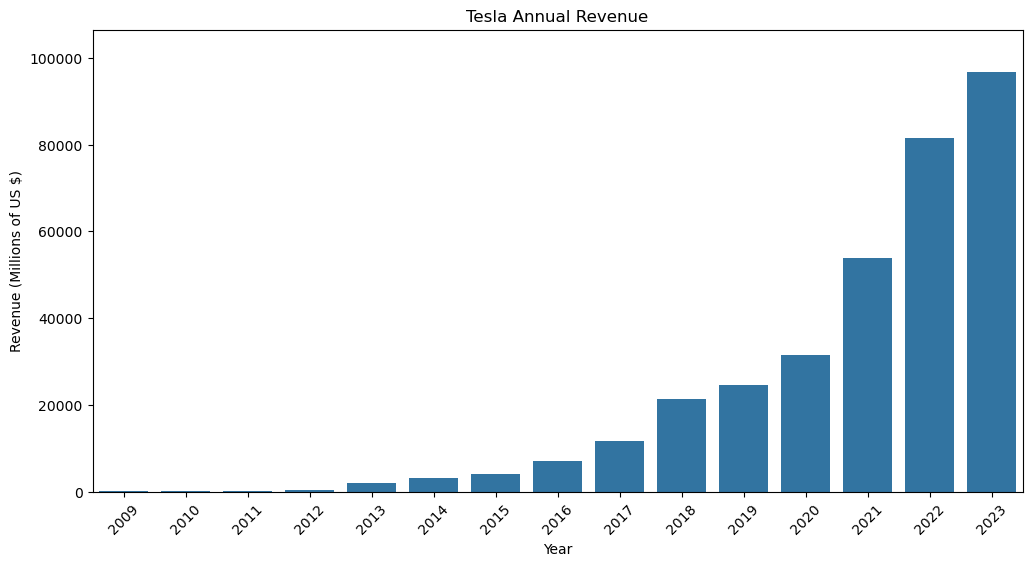

In [102]:
# Create a line chart for Tesla stock prices using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=tesla_data)
plt.title('Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for Tesla revenue using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Revenue (Millions of US $)', data=tesla_revenue)
plt.title('Tesla Annual Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions of US $)')
plt.ylim(0, tesla_revenue['Revenue (Millions of US $)'].max() * 1.1)  # Set y-axis limits to start from 0 and go slightly above the max value
plt.xticks(rotation=45)
plt.show()

## GameStop Stock and Revenue Dashboard

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming tesla_data and tesla_revenue are already defined and cleaned

# Example data (if not defined)
# tesla_revenue = pd.DataFrame({
#     'Year': ['2023-01-01', '2022-01-01', '2021-01-01', '2020-01-01', '2019-01-01'],
#     'Revenue (Millions of US $)': [96773, 81462, 53823, 31536, 24578]
# })

# Convert the 'Year' column to datetime
gme_revenue['Year'] = pd.to_datetime(gme_revenue['Year'], errors='coerce')

# Extract year from the 'Year' column and update the dataframe
gme_revenue['Year'] = gme_revenue['Year'].dt.year

# Convert the 'Revenue (Millions of US $)' column to numeric
gme_revenue['Revenue (Millions of US $)'] = gme_revenue['Revenue (Millions of US $)'].replace(r'[\$,]', '', regex=True).astype(float)

# Display the tesla_revenue DataFrame to inspect the data
print("gme_revenue DataFrame after converting 'Year' to datetime and extracting year:")
print(gme_revenue)

gme_revenue DataFrame after converting 'Year' to datetime and extracting year:
    Year  Revenue (Millions of US $)
0   2024                      5273.0
1   2023                      5927.0
2   2022                      6011.0
3   2021                      5090.0
4   2020                      6466.0
5   2019                      8285.0
6   2018                      8547.0
7   2017                      7965.0
8   2016                      9364.0
9   2015                      9296.0
10  2014                      9040.0
11  2013                      8887.0
12  2012                      9551.0
13  2011                      9474.0
14  2010                      9078.0
15  2009                      8806.0


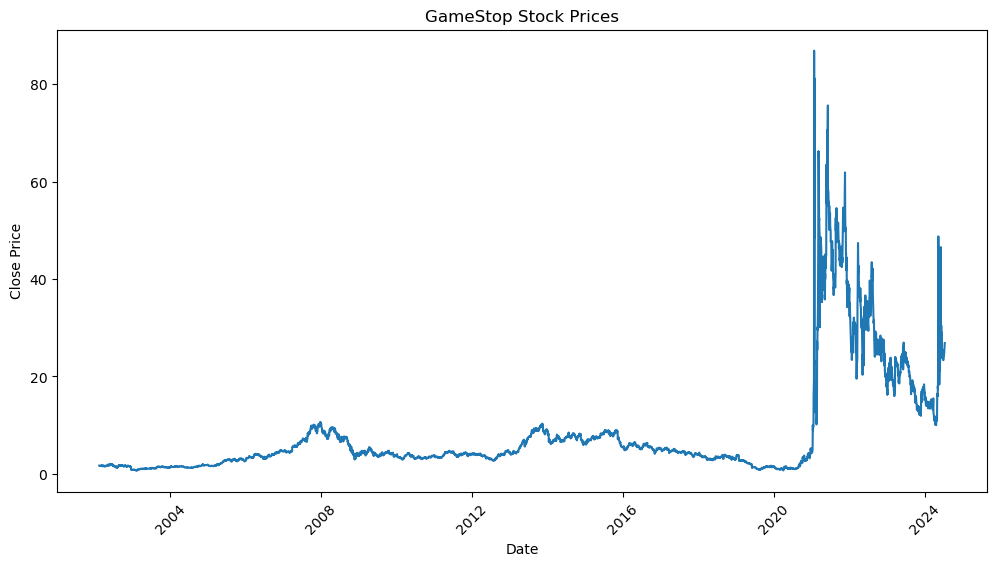

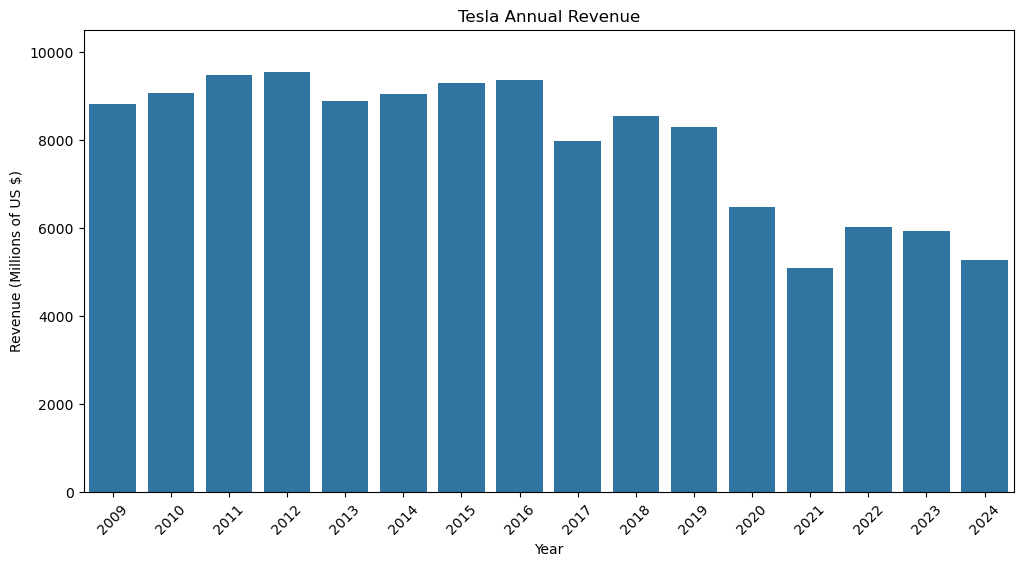

In [111]:
# Create a line chart for GameStop stock prices using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=gme_data)
plt.title('GameStop Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for GameStop revenue using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Revenue (Millions of US $)', data=gme_revenue)
plt.title('Tesla Annual Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions of US $)')
plt.ylim(0, gme_revenue['Revenue (Millions of US $)'].max() * 1.1)  # Set y-axis limits to start from 0 and go slightly above the max value
plt.xticks(rotation=45)
plt.show()